# Нейронная сеть прямого распространения

Нейронная сеть прямого распространения (Feedforward Neural Network) - это архитектура искусственной нейронной сети, в которой информационный поток передается только в одном направлении: от входных узлов через скрытые слои (при наличии) к выходным узлам. 

Она состоит из одного или нескольких скрытых слоев нейронов, каждый из которых связан с последующим слоем. Входные данные проходят через сеть, преобразуясь на каждом слое с помощью весов и функций активации, прежде чем выходить на выходной слой, который возвращает прогнозы или классификацию. Этот тип сети широко используется для задач обработки данных, таких как классификация, регрессия и другие.

# Лабораторная работа

In [1]:
# Необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Генерация синтетических данных для задачи регрессии

X, y = make_regression(n_samples=1000, n_features=1, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df = pd.DataFrame(data=X)
df.head()

,0
0,-2.552990
1,1.764052
2,-1.791328
3,-1.214077
4,-1.444940


In [3]:
# Обучение нейронной сети прямого распространения

regressor = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, alpha=0.0001, solver='adam', verbose=False, random_state=42, tol=0.0001)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/Users/brusn/PycharmProjects/nsu-ml/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# Оценка качества модели

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 29.91365802556886
R^2 Score: 0.9947239942679195


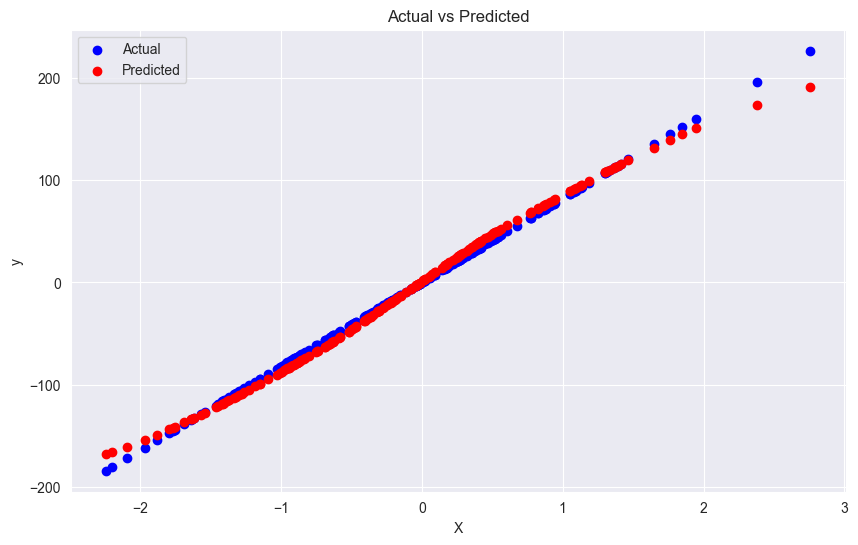

In [5]:
# Визуализация результатов

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()